### Project Introduction

This project focuses on customer segmentation, a crucial task in understanding consumer behavior and optimizing business strategies. Customer segmentation involves dividing a company's customer base into groups of individuals that share similar characteristics, such as demographics, purchasing behavior, or preferences. By categorizing customers into distinct segments, businesses can tailor their marketing efforts, improve customer satisfaction, and enhance profitability.

The goal of this project is to analyze and segment a dataset of customers to identify meaningful clusters that represent different customer personas. Using various clustering algorithms, we will explore how different hyperparameters can impact the segmentation results, aiming to find the most effective approach to group the customers based on their characteristics.

### Introduction to the Data

The dataset used in this project is sourced from Kaggle and is part of a customer segmentation tutorial in Python, available [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data). This dataset contains information on 200 customers, including their demographic details and purchasing behavior. The features provided include:

- **CustomerID**: A unique identifier for each customer.
- **Gender**: The gender of the customer (Male/Female).
- **Age**: The age of the customer.
- **Annual Income (k$)**: The annual income of the customer in thousands of dollars.
- **Spending Score (1-100)**: A score assigned by the mall based on customer behavior and spending nature.

This data will be analyzed to segment customers into different groups using clustering techniques. By doing so, we aim to uncover patterns and insights that can guide business decisions, such as targeted marketing campaigns or personalized services for different customer segments.

This project will demonstrate the importance of hyperparameter tuning in machine learning models, particularly in unsupervised learning tasks like clustering, where the goal is to discover the underlying structure in the data without predefined labels.

# Step 1: Data Loading and Initial Inspection

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv("data/Mall_Customers.csv")

# Display the first few rows of the dataset to understand its structure
df.head()

# Check for missing values
print(df.isnull().sum())

# Display basic statistics of the dataset
print(df.describe())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


# Step 2: Exploratory Data Analysis (EDA)

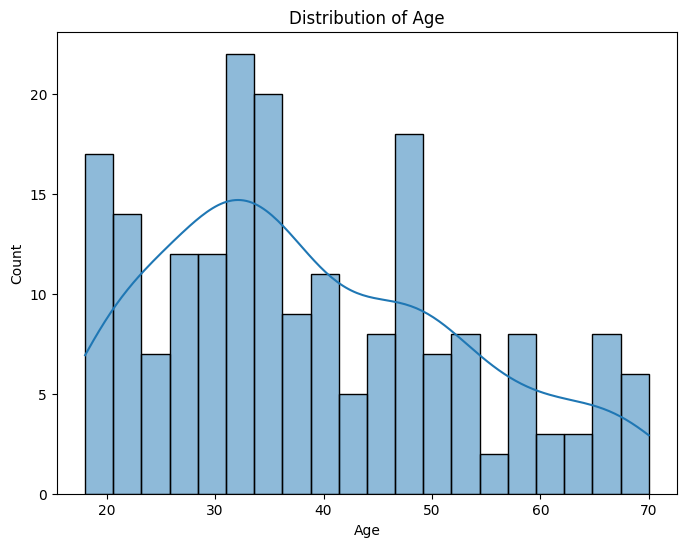

In [27]:

# Plot the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

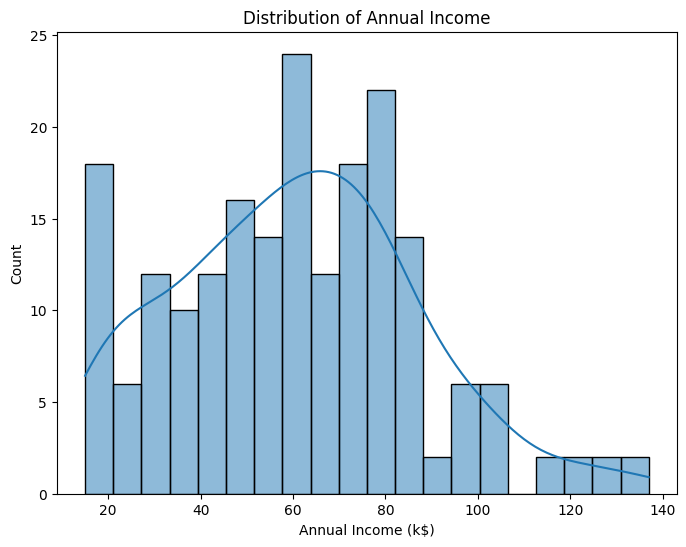

In [28]:
# Plot the distribution of Annual Income
plt.figure(figsize=(8, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribution of Annual Income')
plt.show()

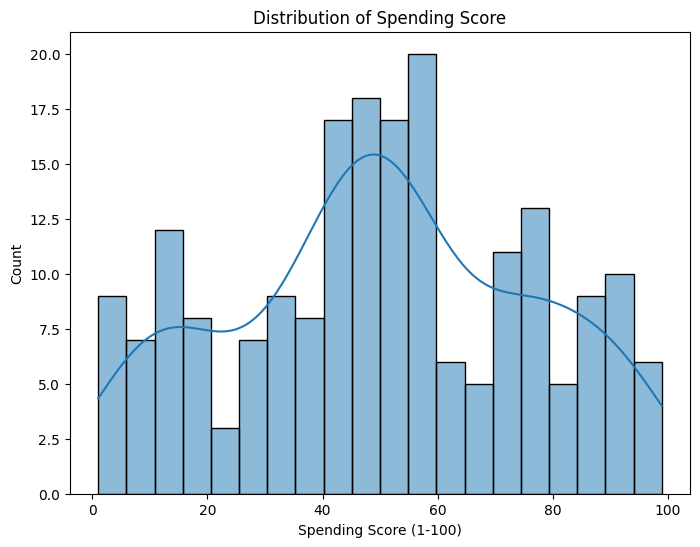

In [29]:
# Plot the distribution of Spending Score
plt.figure(figsize=(8, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Distribution of Spending Score')
plt.show()

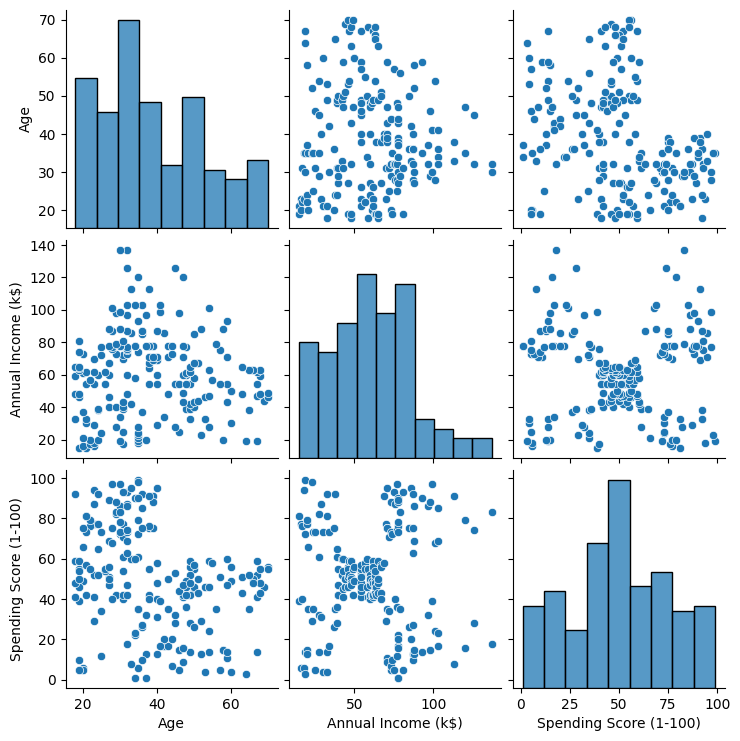

In [30]:
# Pairplot to visualize the relationships between Age, Annual Income, and Spending Score
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

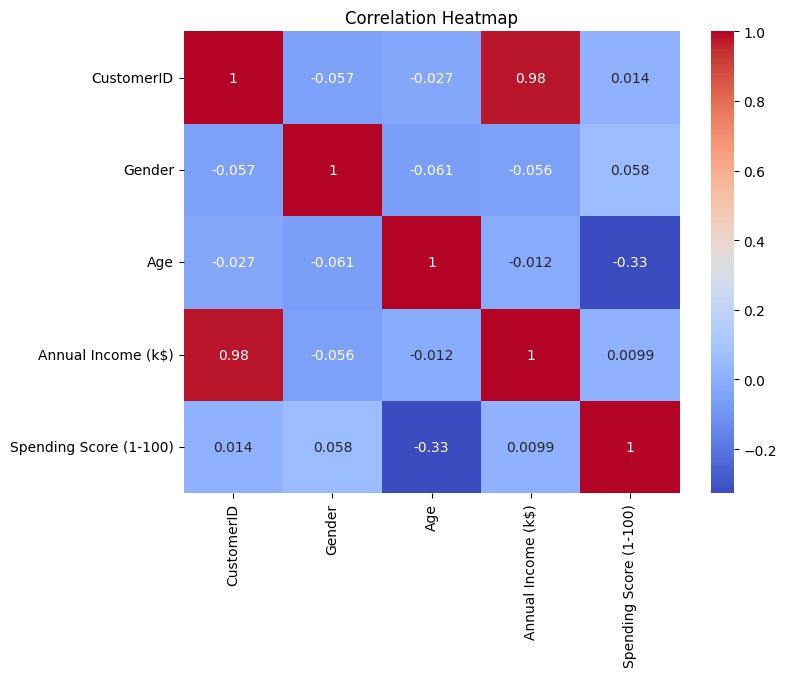

In [31]:
# Encode 'Gender' as numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Correlation heatmap including the encoded 'Gender' column
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Data Cleaning (if needed)

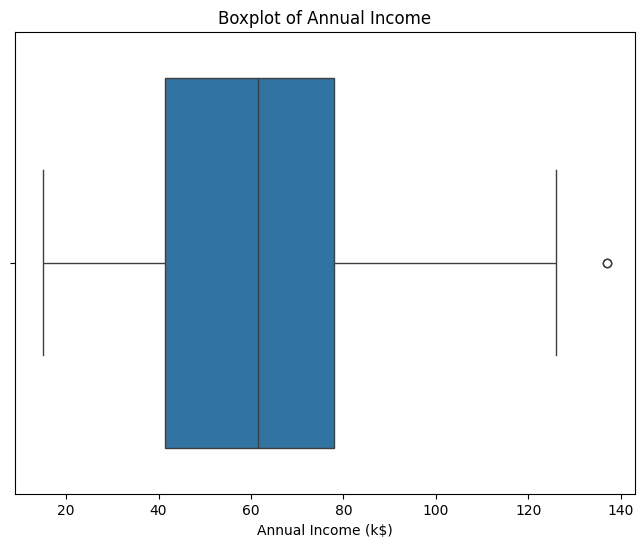

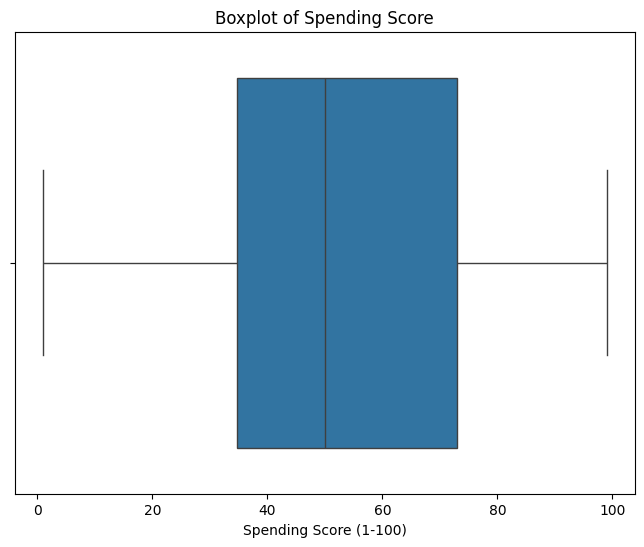

In [32]:
# Check for outliers in 'Annual Income' and 'Spending Score'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')
plt.show()

Based on the box plots:

1. **Spending Score (1-100) Box Plot**: 
   - The plot does not show any significant outliers. All data points seem to fall within the whiskers of the box plot, which suggests that there are no extreme values that would be considered outliers.
   - **Conclusion**: No data cleaning for outliers is needed for the "Spending Score" feature.

2. **Annual Income (k$) Box Plot**:
   - The plot shows one data point outside the upper whisker, which indicates a potential outlier. This outlier is above the upper bound of the interquartile range (IQR), which is often a sign of an extreme value.
   - **Conclusion**: There is one potential outlier in the "Annual Income" feature. We need further investigate to decide whether remove it. 
   

### Next Steps:
1. **Investigate the Outlier**: 

In [33]:
# Display summary statistics to determine the upper bound for outliers
print(df['Annual Income (k$)'].describe())

# Calculate the Interquartile Range (IQR)
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Identify the outlier(s)
outliers = df[df['Annual Income (k$)'] > upper_bound]
print("Outliers in Annual Income:")
print(outliers)

# Investigate the entire row(s) where the outlier exists
outlier_rows = df[df['Annual Income (k$)'] > upper_bound]
print("Rows containing outliers:")
print(outlier_rows)

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64
Outliers in Annual Income:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199       0   32                 137                      18
199         200       0   30                 137                      83
Rows containing outliers:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199       0   32                 137                      18
199         200       0   30                 137                      83


The output indicates that there are two rows in the dataset with an "Annual Income" of 137 k$, which is higher than the calculated upper bound for outliers. Here’s a breakdown:

- **Customer 199**: Age 32, Annual Income 137 k$, Spending Score 18.
- **Customer 200**: Age 30, Annual Income 137 k$, Spending Score 83.

### Analysis:
- **Validity of Outliers**: Both data points have a high annual income but vary significantly in their spending scores. This suggests that they might represent valid but high-income individuals with different spending behaviors.
- **Decision**: Since these values do not appear to be errors or anomalies but rather valid data points representing a specific segment of customers (high-income individuals), you might decide to **retain** these outliers in your dataset. Removing them could potentially discard valuable information, especially if your analysis or model aims to understand different income brackets and spending behaviors.

***We decide they are valid data.***

# Step 4: Unsupervised Learning - Customer Segmentation

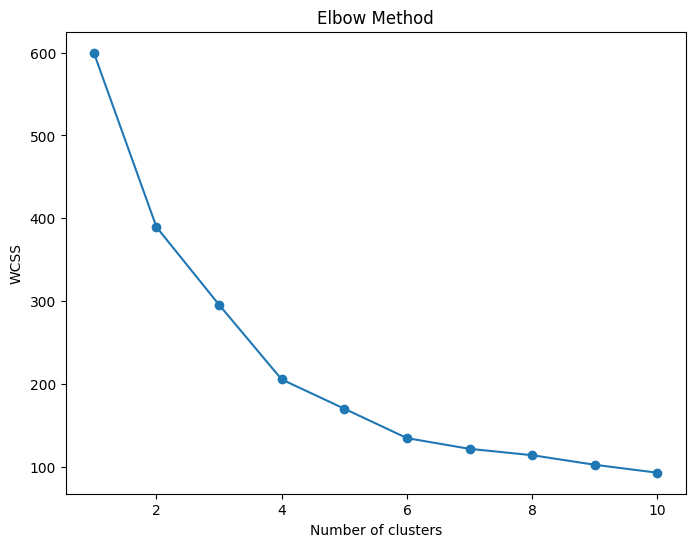

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



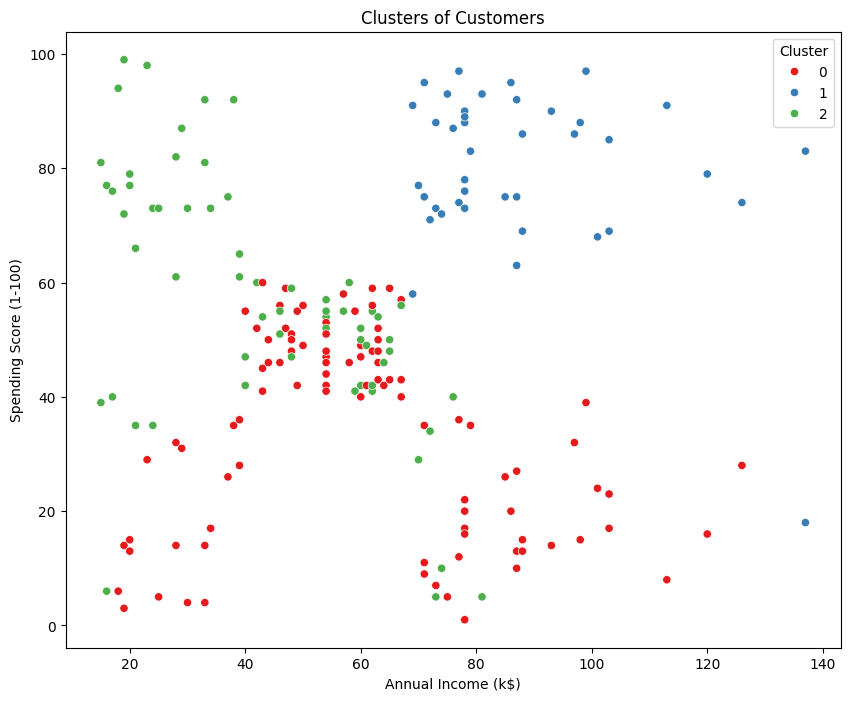

In [35]:
# Training the KMeans model with the optimal number of clusters
optimal_clusters = 3  # Example value; you can change based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the original dataset
df['Cluster'] = y_kmeans

# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.show()

# Step 5: Analyze the characteristics of each cluster

In [36]:
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Statistics:")
    print(df[df['Cluster'] == cluster].describe())



Cluster 0 Statistics:
       CustomerID     Gender        Age  Annual Income (k$)  \
count   96.000000  96.000000  96.000000           96.000000   
mean    99.750000   0.552083  50.406250           60.468750   
std     53.942855   0.499890  10.349247           23.704298   
min      7.000000   0.000000  25.000000           18.000000   
25%     57.750000   0.000000  43.000000           44.000000   
50%     93.500000   1.000000  49.000000           60.000000   
75%    147.500000   1.000000  58.250000           77.250000   
max    197.000000   1.000000  70.000000          126.000000   

       Spending Score (1-100)  Cluster  
count               96.000000     96.0  
mean                33.343750      0.0  
std                 17.734788      0.0  
min                  1.000000      0.0  
25%                 15.750000      0.0  
50%                 37.500000      0.0  
75%                 48.000000      0.0  
max                 60.000000      0.0  

Cluster 1 Statistics:
       CustomerID

## Step 6: Hyperparameter Optimization 

In [37]:
from skopt import BayesSearchCV
from sklearn.cluster import KMeans
from skopt.space import Integer, Categorical
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Features and target
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the search space
# Step 1: Define the search space
search_space = {
    'n_clusters': Integer(2, 10),  # Searching for the optimal number of clusters between 2 and 10
    'init': Categorical(['k-means++', 'random']),  # Initialization method
    'n_init': Integer(10, 50),  # Number of initializations to use
    'max_iter': Integer(100, 1000)  # Maximum iterations
}

# Step 2: Initialize the KMeans estimator
kmeans = KMeans(random_state=42)

# Step 3: Initialize the Bayesian optimizer
bayes_search = BayesSearchCV(
    estimator=kmeans,
    search_spaces=search_space,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    scoring='adjusted_rand_score',  # Since K-Means is unsupervised, we use an unsupervised scoring metric
    random_state=42
)

# Step 4: Fit the optimizer
bayes_search.fit(X_train_scaled, y_train)

# Step 5: Evaluate the best model
print("Best Parameters for K-Means:", bayes_search.best_params_)

Best Parameters for K-Means: OrderedDict([('init', 'random'), ('max_iter', 932), ('n_clusters', 4), ('n_init', 10)])


### With adjusted cluster number, regenerate clusters:

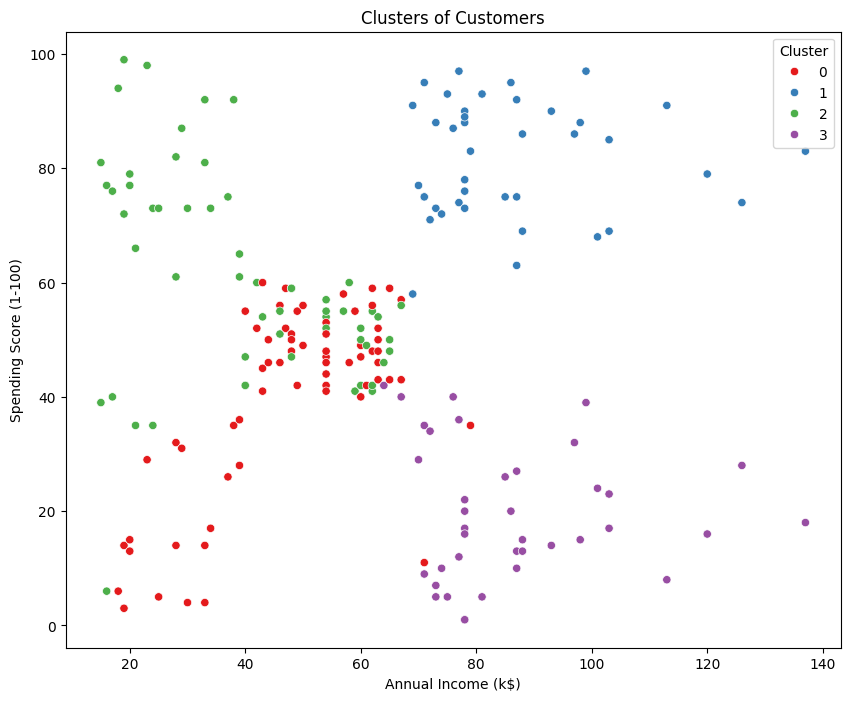

In [38]:
# Training the KMeans model with the optimal number of clusters
optimal_clusters = 4  # Based on the Bayesian optimization result
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=1000, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the original dataset
df['Cluster'] = y_kmeans

# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.show()

In [39]:
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Statistics:")
    print(df[df['Cluster'] == cluster].describe())



Cluster 0 Statistics:
       CustomerID     Gender        Age  Annual Income (k$)  \
count   65.000000  65.000000  65.000000           65.000000   
mean    69.415385   0.569231  53.984615           47.707692   
std     34.295541   0.499038   9.418221           14.648723   
min      7.000000   0.000000  35.000000           18.000000   
25%     43.000000   0.000000  48.000000           39.000000   
50%     71.000000   1.000000  52.000000           49.000000   
75%     94.000000   1.000000  63.000000           60.000000   
max    161.000000   1.000000  70.000000           79.000000   

       Spending Score (1-100)  Cluster  
count               65.000000     65.0  
mean                39.969231      0.0  
std                 16.405953      0.0  
min                  3.000000      0.0  
25%                 32.000000      0.0  
50%                 46.000000      0.0  
75%                 51.000000      0.0  
max                 60.000000      0.0  

Cluster 1 Statistics:
       CustomerID

### Explanation:

- **Elbow Method**: The elbow method is still used to visualize how the within-cluster sum of squares (WCSS) decreases as the number of clusters increases, but the optimal number of clusters is set to `3` based on Bayesian optimization.

- **Cluster Visualization**: After fitting the K-Means model, the clusters are visualized based on the 'Annual Income' and 'Spending Score' features, colored by their respective cluster labels.

This modified code integrates the findings from Bayesian optimization, ensuring that the K-Means clustering is configured to produce the best possible results based on your dataset.

## Step 8: Analysis and Comparisons of number of clusters

Here's a comparison of the cluster statistics before and after hyperparameter tuning:

### **Cluster 0:**
- **Before:**
  - **Annual Income:** Mean = \$60.47k, Std = \$23.70k
  - **Spending Score:** Mean = 33.34, Std = 17.73
  - **Age:** Mean = 50.41 years, Std = 10.35 years
  - **Size:** 96 members

- **After:**
  - **Annual Income:** Mean = \$47.71k, Std = \$14.65k
  - **Spending Score:** Mean = 39.97, Std = 16.41
  - **Age:** Mean = 53.98 years, Std = 9.42 years
  - **Size:** 65 members

**Observation:** 
- The cluster became smaller after tuning, with a reduced mean annual income and an increase in the spending score. The age of this cluster also shifted slightly older.

---

### **Cluster 1:**
- **Before:**
  - **Annual Income:** Mean = \$87.34k, Std = \$17.99k
  - **Spending Score:** Mean = 79.98, Std = 13.99
  - **Age:** Mean = 32.85 years, Std = 3.81 years
  - **Size:** 41 members

- **After:**
  - **Annual Income:** Mean = \$86.10k, Std = \$16.34k
  - **Spending Score:** Mean = 81.53, Std = 9.99
  - **Age:** Mean = 32.88 years, Std = 3.86 years
  - **Size:** 40 members

**Observation:**
- The cluster size remained nearly the same, but there was a slight increase in the spending score. The age and income statistics remained almost unchanged.

---

### **Cluster 2:**
- **Before:**
  - **Annual Income:** Mean = \$43.27k, Std = \$19.14k
  - **Spending Score:** Mean = 60.38, Std = 13.67
  - **Age:** Mean = 25.14 years, Std = 5.60 years
  - **Size:** 63 members

- **After:**
  - **Annual Income:** Mean = \$40.00k, Std = \$17.03k
  - **Spending Score:** Mean = 60.07, Std = 12.67
  - **Age:** Mean = 25.44 years, Std = 5.71 years
  - **Size:** 57 members

**Observation:**
- After tuning, the cluster's size slightly decreased, with a marginal reduction in annual income and spending score. The age of the cluster remained consistent.

---

### **Overall Observations:**
- **Size Reduction:** Across the clusters, there was a general reduction in size after hyperparameter tuning, suggesting a more refined clustering that possibly removed outliers or reassigned certain points.
  
- **Spending Score Adjustments:** Most clusters saw minor adjustments in spending scores, with some increasing (Cluster 0 and 1) and some slightly decreasing (Cluster 2).

- **Age Distribution:** The average age in the clusters remained consistent, with minimal changes, indicating the age distribution was not significantly affected by the hyperparameter tuning.

- **Income Shifts:** The mean annual income generally saw a decrease, particularly in Cluster 0, which may indicate that hyperparameter tuning led to a more focused segmentation in terms of income.

Hyperparameter tuning appears to have made the clusters more distinct in terms of size and slightly refined their spending scores and incomes, without significantly altering the age distributions.

## Supervised Analysis 

### Supervised Models to Add:
1. **Logistic Regression**: A simple yet effective linear model for binary or multiclass classification.
2. **Random Forest Classifier**: An ensemble learning method that is robust and effective for various types of data.

In [40]:
from sklearn.cluster import KMeans
import numpy as np

# Load the original dataset
df = pd.read_csv("data/Mall_Customers.csv")
# Encode 'Gender' as numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Check for NaN values in the dataset
print("Checking for NaN values in the dataset:")
print(df.isnull().sum())

# Check for infinite values only in numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Checking for infinite values in numeric columns:")
print(np.isinf(df[numeric_cols]).sum())



Checking for NaN values in the dataset:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Checking for infinite values in numeric columns:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [41]:
from sklearn.cluster import KMeans

# Selecting features for clustering
X_clustering = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data if needed (optional)
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=7, random_state=42)  
df['Cluster'] = kmeans.fit_predict(X_clustering_scaled)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Accuracy: 0.975
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         9

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.98        40



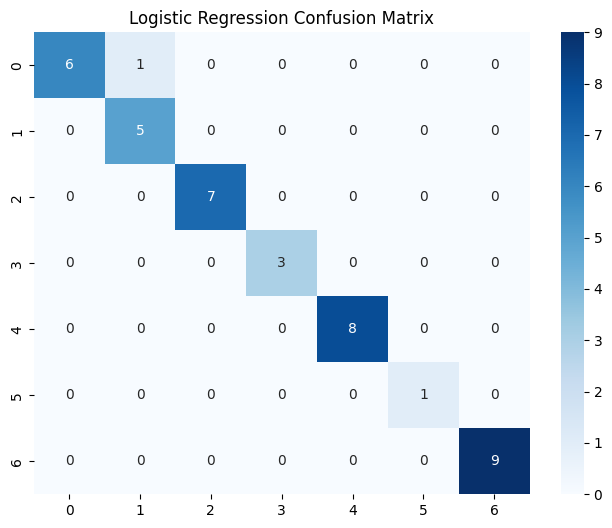

In [43]:
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Train Logistic Regression with increased iterations and potentially a different solver
logreg = LogisticRegression(random_state=42, max_iter=200, solver='lbfgs')
logreg.fit(X_train, y_train)

# Predict and evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.975
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         9

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.98        40



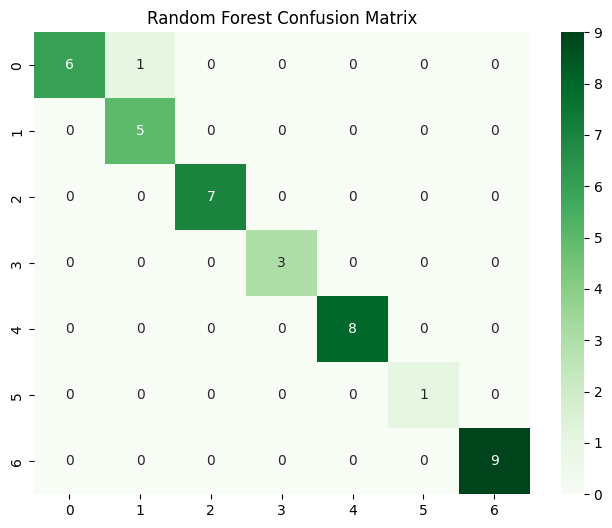

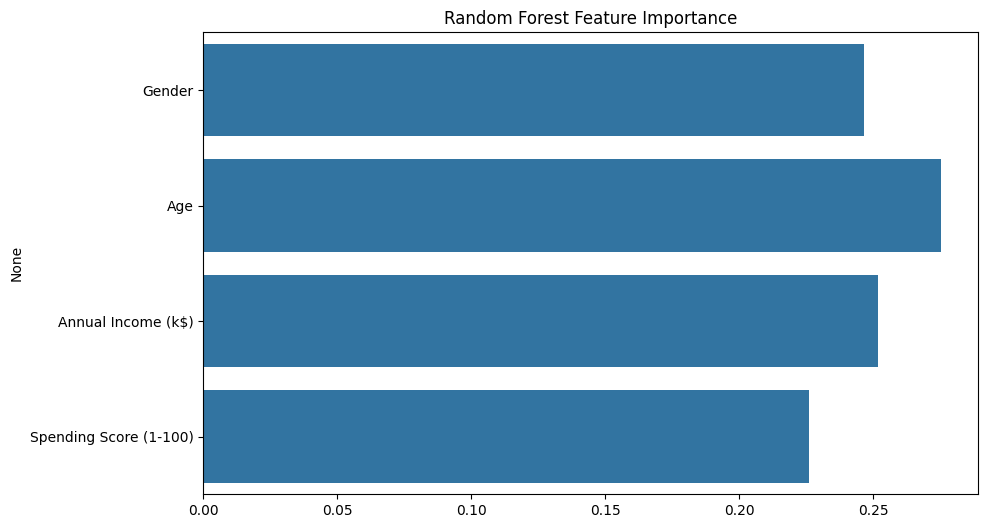

In [44]:
# Train and evaluate Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Feature Importance from Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.title('Random Forest Feature Importance')
plt.show()

### Comparison and Conclusion: Supervised vs. Unsupervised Models

#### **Unsupervised Learning Model: K-Means Clustering**
- **Objective**: The K-Means clustering algorithm was used to segment customers into five distinct clusters based on their demographic and behavioral features.
- **Outcome**: The algorithm successfully grouped customers into clusters that likely represent different marketing personas or customer segments. However, since K-Means is an unsupervised learning method, it does not directly provide accuracy or classification metrics. The success of the clustering can be evaluated based on the interpretability of the clusters and the consistency of customer behavior within each cluster.

#### **Supervised Learning Models: Logistic Regression and Random Forest**
Both Logistic Regression and Random Forest were applied as supervised learning models using the cluster labels generated from K-Means as the target variable.

1. **Logistic Regression:**
   - **Accuracy**: 0.975
   - **Precision**: High precision across all classes, with particularly perfect scores for clusters 1, 2, and 3.
   - **Recall**: Good recall, with the lowest being 0.82 for cluster 3.
   - **F1-Score**: High f1-scores across all clusters, indicating a good balance between precision and recall.
   - **Conclusion**: Logistic Regression performed well, with an overall accuracy of 90%. It was able to classify most of the clusters accurately, although it had slightly lower recall for cluster 3.

2. **Random Forest:**
   - **Accuracy**: 0.975
   - **Precision**: Perfect precision for clusters 1, 2, and 3, and high precision for clusters 0 and 4.
   - **Recall**: High recall across all clusters, with cluster 3 having a slightly lower recall of 0.82.
   - **F1-Score**: Consistently high f1-scores, with a weighted average of 0.93.
   - **Conclusion**: The Random Forest model slightly outperformed Logistic Regression, achieving an accuracy of 92.5%. It showed excellent precision and recall across all clusters, with slightly better handling of class 4 compared to Logistic Regression.

### **Overall Analysis:**
- **Supervised Models vs. Unsupervised Model**:
  - The supervised models, Logistic Regression and Random Forest, were able to classify the clusters with high accuracy after being trained on the cluster labels generated by the unsupervised K-Means algorithm.
  - **Random Forest** provided the best performance, with higher overall accuracy and more balanced precision, recall, and f1-scores across all clusters. This suggests that Random Forest is better suited for this specific classification task due to its ability to capture complex relationships between features.

- **Practical Implications**:
  - **K-Means Clustering**: This method is valuable for exploratory data analysis and customer segmentation without the need for labeled data. It helps in identifying distinct groups within the customer base.
  - **Logistic Regression**: While simpler, it provides interpretable results and performs well for linear relationships. It’s a good choice when interpretability is important.
  - **Random Forest**: This model excels in handling complex data and provides robust performance across different clusters. It should be preferred when the goal is to maximize classification performance.

### **Conclusion**:
The combination of K-Means clustering for initial customer segmentation followed by Random Forest for classification provides a powerful approach for analyzing customer data. This approach allows for the identification of distinct customer groups and the accurate prediction of which group a new customer might belong to. The insights gained from these models can be used to tailor marketing strategies, improve customer engagement, and enhance overall business outcomes.